In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [9]:
df = pd.read_csv("./dataset/listings.csv")
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

In [10]:
columns = [
    "review_scores_value",
    "number_of_reviews",
    "review_scores_rating",
    "host_response_rate",
    "host_acceptance_rate",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "host_is_superhost",
   #  "host_since",
]


In [11]:
X = df[columns]
X = X.dropna()

In [12]:
X = X.sort_values(by=['host_is_superhost'])[-(946+946):]

In [13]:
X

,review_scores_value,number_of_reviews,review_scores_rating,host_response_rate,host_acceptance_rate,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,host_is_superhost
7601,10.0,7,100.0,1.00,1.00,10.0,10.0,10.0,f
7602,10.0,4,100.0,1.00,0.98,10.0,10.0,10.0,f
7683,10.0,3,100.0,0.90,1.00,10.0,10.0,10.0,f
7682,10.0,1,100.0,0.75,0.73,10.0,10.0,10.0,f
7681,10.0,1,100.0,1.00,0.33,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...
2021,10.0,114,99.0,1.00,0.78,10.0,10.0,10.0,t
5420,10.0,18,99.0,1.00,1.00,10.0,10.0,10.0,t
5419,10.0,7,100.0,0.67,1.00,10.0,10.0,10.0,t
5411,10.0,32,98.0,1.00,0.94,10.0,10.0,10.0,t


In [14]:

y = X["host_is_superhost"]
y = y.to_numpy()
tf = lambda t: 1 if t == 't' else 0;
y = np.array([tf(xi) for xi in y])

X = X.drop("host_is_superhost", axis=1)

In [15]:
y.sum()

946

In [16]:
y[y=='t'].shape

/home/yoda/.virtualenvs/MLAssign/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


(0, 1892)

In [17]:
y[y=='f'].shape

/home/yoda/.virtualenvs/MLAssign/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


(0, 1892)

In [18]:
X

,review_scores_value,number_of_reviews,review_scores_rating,host_response_rate,host_acceptance_rate,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin
7601,10.0,7,100.0,1.00,1.00,10.0,10.0,10.0
7602,10.0,4,100.0,1.00,0.98,10.0,10.0,10.0
7683,10.0,3,100.0,0.90,1.00,10.0,10.0,10.0
7682,10.0,1,100.0,0.75,0.73,10.0,10.0,10.0
7681,10.0,1,100.0,1.00,0.33,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...
2021,10.0,114,99.0,1.00,0.78,10.0,10.0,10.0
5420,10.0,18,99.0,1.00,1.00,10.0,10.0,10.0
5419,10.0,7,100.0,0.67,1.00,10.0,10.0,10.0
5411,10.0,32,98.0,1.00,0.94,10.0,10.0,10.0


In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np

class modelTrainHelper:
    """
    this class is a helper class which would help us train and test different sklearn models for our assignment
    """
    def getCrossValScore(self,model,X,y,cv=5):
        """
        General function to do the cross validation on our classification model
        :param model: Fresh model instance of our model
        :param X: whole training data.
        :param y: output of the data.
        :param cv: fraction to choose test data.
        :return:
        """
        scores = cross_val_score(model, X, y, cv=cv, scoring="f1")
        meanF1 = np.array(scores).mean()
        stdF1  = np.array(scores).std()

        return meanF1,stdF1

In [20]:
def multibarplot(data,title,filePath=None,Xlabel=""):
    """
    plot the error between the X vs Y and Z
    :param x: horizontal axis data
    :param y: y axis data usually mean error here
    :param z: z axis data usually Std error here
    :return:
    """
    plt.rc("font", size = 18)
    plt.title(title)
    plt.rcParams["figure.constrained_layout.use"] = True
    # for x,y,z in data:
    plt.errorbar(data[0], data[1], yerr=data[2], linewidth=3,label='Error Bar plot')
    plt.xlabel(Xlabel)
    plt.ylabel("F1 Score")
    plt.legend(bbox_to_anchor=(1.12, 1.1),loc='upper right')
    if filePath is None:
        plt.show()
    else:
        plt.savefig(filePath)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
Xpoly = PolynomialFeatures(2).fit_transform(X)
Xpoly_test = PolynomialFeatures(2).fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
# modelLogReg = LogisticRegression(penalty='l1', solver='liblinear', C=4, max_iter=1000)
# modelLogReg.fit(X,y)
trainingHelper = modelTrainHelper()

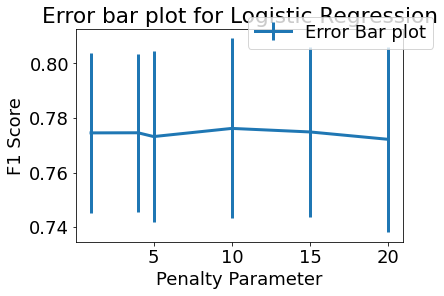

In [28]:
pentaltyParamsToUse = [1,4,5,10,15,20]
meanTotal = []
stdTotal = []
for pentaltyParam in pentaltyParamsToUse:
    model = LogisticRegression(penalty='l1', solver='liblinear', C=pentaltyParam, max_iter=1000)
    # model = BaggingClassifier(base_estimator=svm.SVC(C=pentaltyParam),n_estimators=10, random_state=0)
#     xTrain = dataDict['Xtrain']
#     yTrain = dataDict['yTrain']
    mean,std = trainingHelper.getCrossValScore(model,X,y)
    meanTotal.append(mean)
    stdTotal.append(std)
multibarplot([pentaltyParamsToUse,meanTotal,stdTotal],"Error bar plot for Logistic Regression",Xlabel="Penalty Parameter")

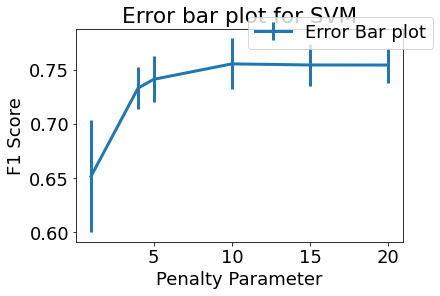

In [32]:
pentaltyParamsToUse = [1,4,5,10,15,20]
meanTotal = []
stdTotal = []
for pentaltyParam in pentaltyParamsToUse:
    model = svm.SVC(C=pentaltyParam)
    mean,std = trainingHelper.getCrossValScore(model,X,y)
    meanTotal.append(mean)
    stdTotal.append(std)
multibarplot([pentaltyParamsToUse,meanTotal,stdTotal],"Error bar plot for SVM",Xlabel="Penalty Parameter")

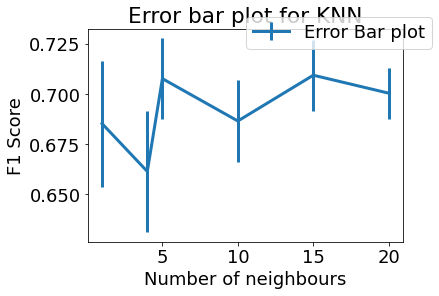

In [30]:
numNeighbours = [1,4,5,10,15,20]
meanTotal = []
stdTotal = []
for neighbourValue in numNeighbours:
    model = KNeighborsClassifier(neighbourValue)
    mean,std = trainingHelper.getCrossValScore(model,X,y)
    meanTotal.append(mean)
    stdTotal.append(std)
multibarplot([pentaltyParamsToUse,meanTotal,stdTotal],"Error bar plot for KNN",Xlabel="Number of neighbours")

/home/yoda/.virtualenvs/MLAssign/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/yoda/.virtualenvs/MLAssign/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/yoda/.virtualenvs/MLAssign/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/yoda/.virtualenvs/MLAssign/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/yoda/.virtualenvs/MLAssign/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: L

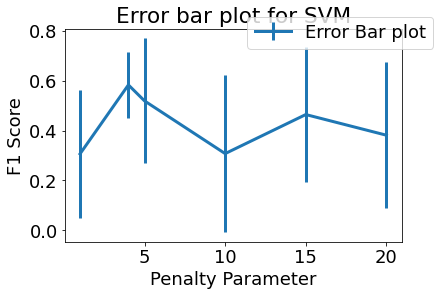

In [33]:
pentaltyParamsToUse = [1,4,5,10,15,20]
meanTotal = []
stdTotal = []
for pentaltyParam in pentaltyParamsToUse:
    model = svm.LinearSVC(C=pentaltyParam)
    mean,std = trainingHelper.getCrossValScore(model,X,y)
    meanTotal.append(mean)
    stdTotal.append(std)
multibarplot([pentaltyParamsToUse,meanTotal,stdTotal],"Error bar plot for SVM",Xlabel="Penalty Parameter")

## Choosing hyper parameters
By looking at the cross validation plots for different classifier, we have chosen the following values for our classifiers.
KNN = number of neighbours = 5
SVM = penalty parameter = 10
Linear SVC = penalty parameter = 4
Logistic regressor = penalty parameter = 10

Top left: True Negatives.   
Bottom left: False Negatives   

Top right: False Positives   
Bottom right: True Positives

In [34]:
modelSvm = svm.SVC(C=10)
modelLogisticRegression = LogisticRegression(penalty='l1', solver='liblinear', C=10, max_iter=1000)
modelKNN = KNeighborsClassifier(5)

In [36]:
from sklearn.metrics import confusion_matrix

In [39]:
print("Confusion matrix for trained logistic regression")
modelLogisticRegression.fit(X,y)
print(confusion_matrix(y_test, modelLogisticRegression.predict(X_test)))

Confusion matrix for trained logistic regression
[[142  69]
 [ 33 175]]


In [41]:
print("Confusion matrix for trained KNN")
modelKNN.fit(X,y)
print(confusion_matrix(y_test, modelKNN.predict(X_test)))

Confusion matrix for trained KNN
[[134  77]
 [ 56 152]]


In [43]:
print("Confusion matrix for trained SVM")
modelSvm.fit(X,y)
print(confusion_matrix(y_test, modelSvm.predict(X_test)))

Confusion matrix for trained SVM
[[117  94]
 [ 21 187]]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, modelLogReg.predict(Xpoly_test)))

[[154  57]
 [ 39 169]]


In [45]:
f = lambda x: 0 if x < 0.5 else 1
baselineYpred = [f(y) for y in np.random.rand(y.shape[0])]
cm = confusion_matrix(y, baselineYpred)
print(cm)

[[215 211]
 [220 202]]


In [89]:
from sklearn.metrics import roc_curve,auc
yScoresKnn = modelKNN.predict_proba(X_test)
fprkn, tprkn, _ = roc_curve(y_test, yScoresKnn[:, 1])
fprlm, tprlm, _ = roc_curve(y_test, modelLogisticRegression.decision_function(X_test))
fprsvm, tprsvm, _ = roc_curve(y_test, modelSvm.decision_function(X_test))

fprDummy = cm[0,1] / (cm[0,0]+ cm[0,1]) # false positive rate = FP/ TN + FP
tprDummy = cm[1,1] / (cm[1,1]+ cm[1,0]) # true positive rate = TP / TP + FN

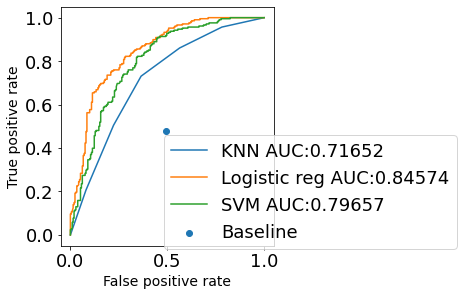

In [90]:
plt.plot(fprkn, tprkn, label="KNN AUC:{:.5f}".format(auc(fprkn,tprkn)))
plt.plot(fprlm, tprlm, label="Logistic reg AUC:{:.5f}".format(auc(fprlm,tprlm)))
plt.plot(fprsvm, tprsvm, label="SVM AUC:{:.5f}".format(auc(fprsvm,tprsvm)))
plt.scatter(fprDummy, tprDummy, label="Baseline")
plt.xlabel("False positive rate", size=14)
plt.ylabel("True positive rate", size=14)
plt.legend(bbox_to_anchor=(1.9, 0.5),loc='upper right')

In [76]:
def getplots(series,gt,columnName):
    series = np.asarray(series)
    gt = np.asarray(gt)
    gtTrueIndices = np.where(gt==1)[0]
    gtFalseIndices = np.where(gt==0)[0]
    trueLabelData = series[gtTrueIndices]
    falseLabelData = series[gtFalseIndices]
    fig, ax = plt.subplots(2,1)
    ax[0].set_title("Subplot for {} when gt is t".format(columnName))
    ax[0].hist(trueLabelData)
    ax[1].set_title("Subplot for {} when gt is f".format(columnName))
    ax[1].hist(falseLabelData)
    ax[0].legend(loc='upper right')
    ax[0].grid(True)

    ax[1].legend(loc='upper right')
    ax[1].grid(True)
    plt.show()
    pass

No handles with labels found to put in legend.
No handles with labels found to put in legend.


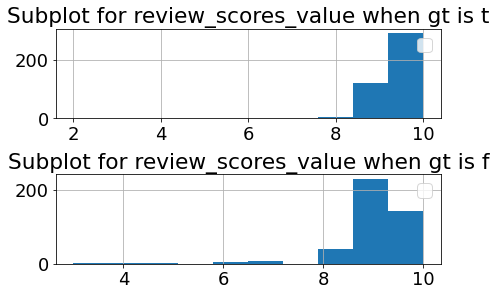

In [77]:
# print(X[:])
getplots(X['review_scores_value'],y,'review_scores_value')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


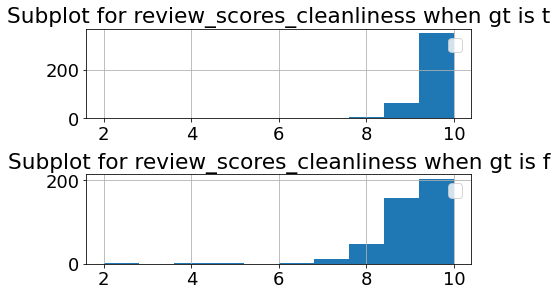

In [78]:
getplots(X['review_scores_cleanliness'],y,'review_scores_cleanliness')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


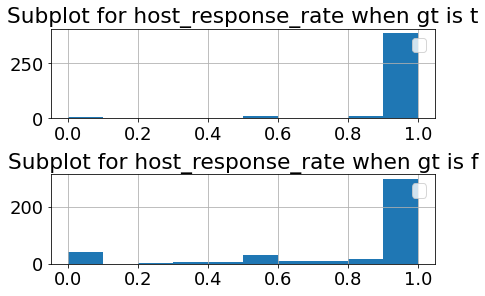

In [79]:
getplots(X['host_response_rate'],y,'host_response_rate')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


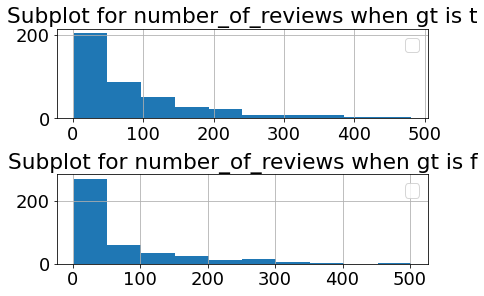

In [80]:
getplots(X['number_of_reviews'],y,'number_of_reviews')

In [ ]:
getplots(X['host_acceptance_rate'],y,'host_acceptance_rate')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


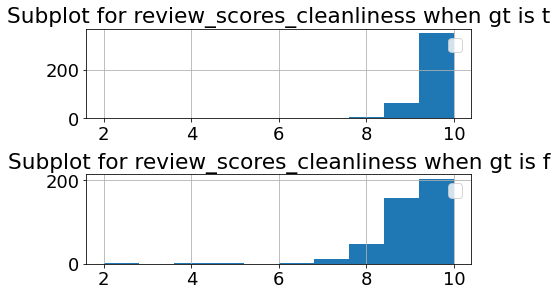

In [82]:
getplots(X['review_scores_cleanliness'],y,'review_scores_cleanliness')

In [87]:
from sklearn.metrics import confusion_matrix,classification_report

In [88]:
print(classification_report(y_test, modelLogisticRegression.predict(X_test)))
print(classification_report(y_test, modelSvm.predict(X_test)))
print(classification_report(y_test, modelKNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.67      0.74       211
           1       0.72      0.84      0.77       208

    accuracy                           0.76       419
   macro avg       0.76      0.76      0.76       419
weighted avg       0.76      0.76      0.75       419

              precision    recall  f1-score   support

           0       0.85      0.55      0.67       211
           1       0.67      0.90      0.76       208

    accuracy                           0.73       419
   macro avg       0.76      0.73      0.72       419
weighted avg       0.76      0.73      0.72       419

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       211
           1       0.66      0.73      0.70       208

    accuracy                           0.68       419
   macro avg       0.68      0.68      0.68       419
weighted avg       0.68      0.68      0.68       419

